In [ ]:
%reload_ext autoreload
%autoreload 2

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import PairsTrading as pt
import requests
import bs4 as bs

# set the seed for the random number generator
np.random.seed(107)

### 1. Import SP500 tickers

In [ ]:
# import SP500 tickers for wikipedia page
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

tickers = []

# Loop on all lines of the wiki table ('tr' is Table Row)
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

# Removes the /n character with list comprehension
tickers = [s.replace('\n', '') for s in tickers]

### 2. Fetch Yahoo historic price data

In [ ]:
# Get the data for this tickers from yahoo finance
data = yf.download(tickers,'2013-1-1','2023-1-1', auto_adjust=True)['Close']
# Create a list of the columns that contain 'nan' and need to be removed
listnan = data.columns[data.isna().any()].tolist()

# Remove the said columns
data.drop(listnan, axis = 1, inplace =True)


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


In [ ]:
data.to_csv('data/SP500.csv')

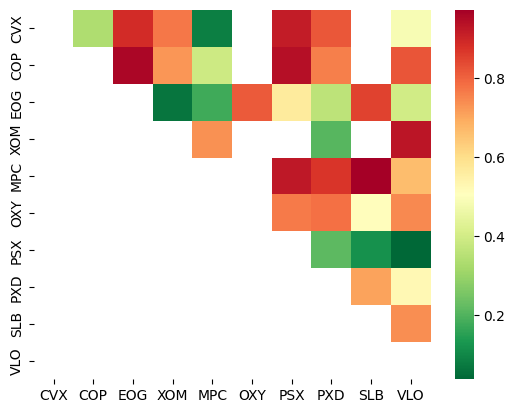

[('PSX', 'VLO')]


In [ ]:
# instrumentIds = list(data.keys()) 

# Top 10 holdings in XLK
# instrumentIds = ['ACN','AAPL','AVGO','CSCO','MA','MSFT','NVDA','CRM','TXN','V']
instrumentIds = ['CVX','COP','EOG','XOM','MPC','OXY','PSX','PXD','SLB','VLO']

scores, pvalues, pairs = pt.find_cointegrated_pairs(data[instrumentIds])

if len(instrumentIds) <= 20:
     seaborn.heatmap(pvalues, xticklabels=instrumentIds, yticklabels=instrumentIds, cmap='RdYlGn_r' , mask = (pvalues >= 0.98))

plt.show()
print(pairs)